In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
coordinates = list(zip(lats, lngs))


In [3]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combinatio
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [4]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [5]:
# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + '&q=' + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

ecord 14 of Set 4 | putina
Processing Record 15 of Set 4 | presidencia roque saenz pena
Processing Record 16 of Set 4 | iisalmi
Processing Record 17 of Set 4 | port lincoln
Processing Record 18 of Set 4 | karpathos
Processing Record 19 of Set 4 | luderitz
Processing Record 20 of Set 4 | port alfred
Processing Record 21 of Set 4 | tasiilaq
Processing Record 22 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 23 of Set 4 | youkounkoun
Processing Record 24 of Set 4 | la ronge
Processing Record 25 of Set 4 | khrebtovaya
Processing Record 26 of Set 4 | kamenka
Processing Record 27 of Set 4 | hamilton
Processing Record 28 of Set 4 | te anau
Processing Record 29 of Set 4 | caravelas
Processing Record 30 of Set 4 | sao filipe
Processing Record 31 of Set 4 | bulungu
Processing Record 32 of Set 4 | san patricio
Processing Record 33 of Set 4 | georgetown
Processing Record 34 of Set 4 | canutama
Processing Record 35 of Set 4 | vao
Processing Record 36 of Set 4 | faanui
Processi

In [6]:
city_data_df = pd.DataFrame(city_data)
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klyuchi,RU,2021-05-26 17:26:25,52.2667,79.1667,82.76,22,24,8.28
1,Aklavik,CA,2021-05-26 17:26:26,68.2191,-135.0107,34.52,74,90,13.80
2,Jamestown,US,2021-05-26 17:22:14,42.0970,-79.2353,80.02,61,40,7.00
3,Albany,US,2021-05-26 17:26:21,42.6001,-73.9662,89.28,52,41,3.00
4,New Norfolk,AU,2021-05-26 17:26:26,-42.7826,147.0587,46.65,65,98,1.99


In [7]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'
# Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [8]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

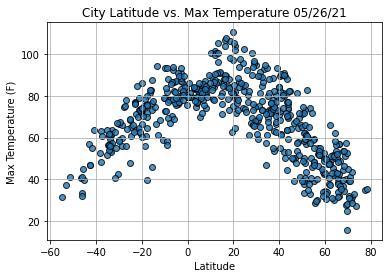

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps, edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

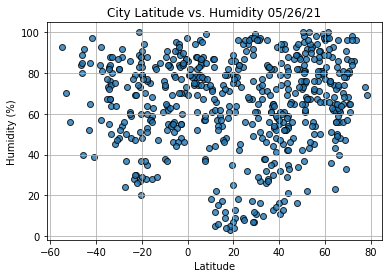

In [17]:
# Build the scatter plot for latitude vs. max temp
plt.scatter(lats, humidity, edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

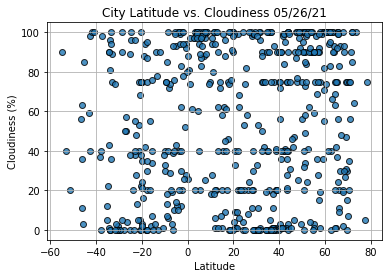

In [16]:
# Build the scatter plot for latitude vs. max temp
plt.scatter(lats, cloudiness, edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

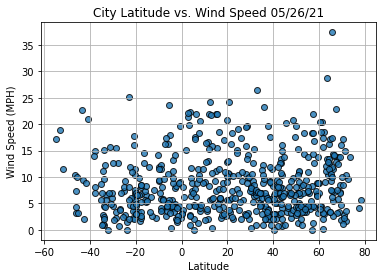

In [18]:
# Build the scatter plot for latitude vs. max temp
plt.scatter(lats, wind_speed, edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a reg line and the equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line 'y values' from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = 'y= ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    # Create a scatter plot and plot the reg line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,'r')
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

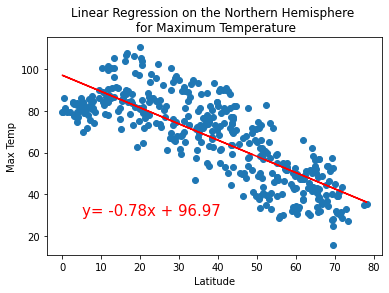

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (5,30))

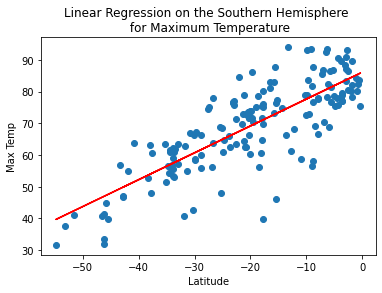

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (5,30))

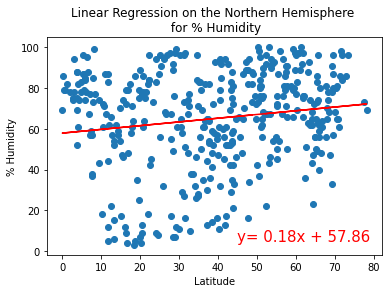

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (45,5))

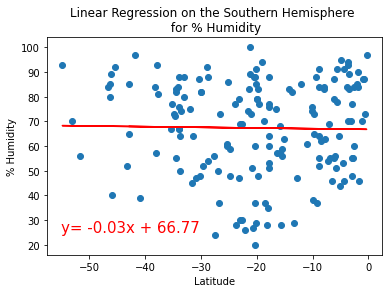

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-55,25))

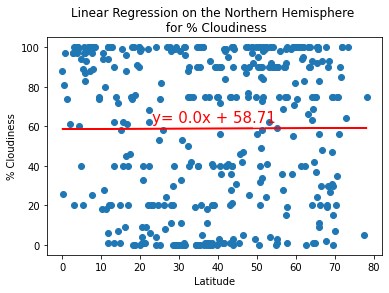

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (23,62))

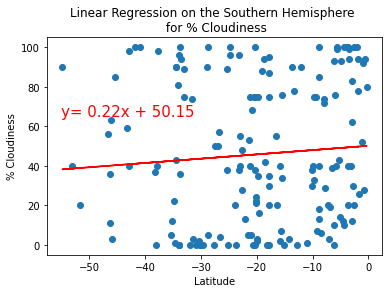

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-55,65))

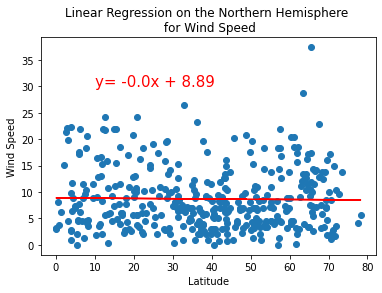

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (10,30))

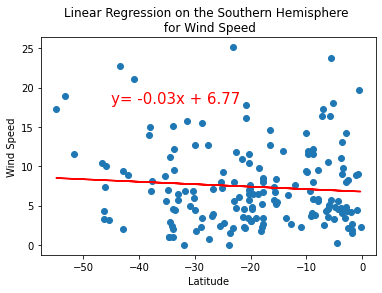

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-45,18))